In [31]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Import data
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Data Preprocessing 

In [33]:
# Drop the columns with NaN values
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [34]:
# Rename columns for clarity:
df.columns = ['label', 'text']

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [36]:
df.isna().sum()

label    0
text     0
dtype: int64

In [37]:
df.duplicated().sum()

403

**Note:** Out data frame doesn't have any missing values but there are 403 duplicates. Let's remove them.

In [38]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [39]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Modeling

In [40]:
# Separate features (X) and target labels (y)
X = df.drop('label', axis=1)
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Why are we performing Count vectorization ?**

We're utilizing the **MultinomialNB()** classifier for this project, which exclusively accepts numeric values. However, our X_train and X_test datasets comprise text data (email messages). This is where **CountVectorizer()** comes in. It is being used here to convert the provided text into a vector, considering the frequency (count) of each word appearing throughout the entire text. This transformation is essential to enable the classifier to work with the text data effectively.

In [41]:
# Create a CountVectorizer instance
vectorizer = CountVectorizer()

In [42]:
# Fit and transform the training data (X_train)
X_train_vectorized = vectorizer.fit_transform(X_train['text'])

# Transform the test data (X_test)
X_test_vectorized = vectorizer.transform(X_test['text'])

In [43]:
# Train the Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [114]:
# Make predictions on the test data
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       889
        spam       0.99      0.91      0.95       145

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034



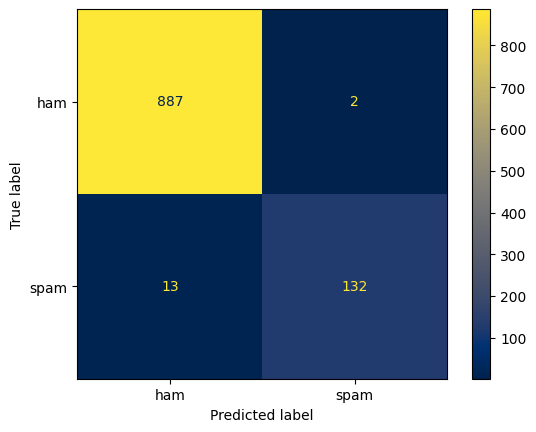

In [112]:
# Plot confusion matrix
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = classifier.classes_)
cm_display.plot(cmap='cividis')
plt.grid(False)
plt.show()

### Visualizing the Data 

Understanding raw numbers or datasets can often be challenging. Therefore, it is crucial to visually represent our data. By generating visual representations of data, complex patterns, trends, and relationships become easier to comprehend than when dealing with raw numbers alone. Visualization also aids in identifying anomalies within the data. In the code snippet below, we have visualized the data using a histogram that displays the distribution of spam and non-spam emails.


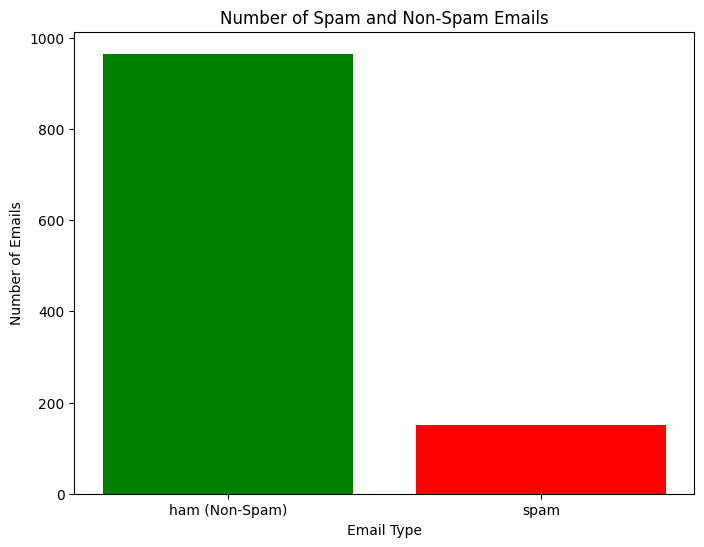

In [11]:
# Count the number of spam and non-spam emails in the test set
spam_counts = y_test.value_counts()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(spam_counts.index, spam_counts.values, color=['green', 'red'])
plt.xlabel('Email Type')
plt.ylabel('Number of Emails')
plt.title('Number of Spam and Non-Spam Emails')
plt.xticks([0, 1], ['ham (Non-Spam)', 'spam'])
plt.show()